In [1]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd
import seaborn as sns
import anndata as an
import scanpy as sc


In [2]:
data_path = '../SourceData/Figure2/'

# Plot raw traces (Figure 2e)

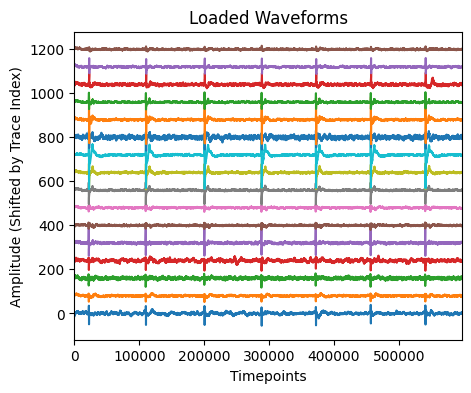

In [3]:
loaded_data = np.load(data_path+"Figure2e_waveforms.npy")

plt.figure(figsize=(5, 4))

gap = 80  # Adjust for visualization
for trace_index, trace in enumerate(loaded_data):
    plt.plot(trace + trace_index * gap)

plt.xlim(0, loaded_data.shape[1]) 
plt.xlabel("Timepoints")
plt.ylabel("Amplitude (Shifted by Trace Index)")
plt.title("Loaded Waveforms")

plt.show()


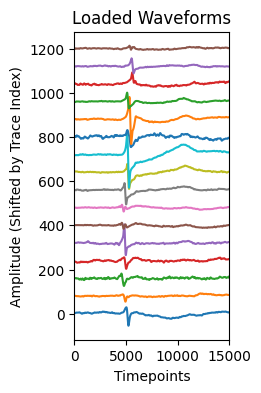

In [4]:
loaded_data = np.load(data_path+"Figure2e_waveforms_zoomin.npy")

plt.figure(figsize=(2, 4))

gap = 80  # Adjust for visualization
for trace_index, trace in enumerate(loaded_data):
    plt.plot(trace + trace_index * gap)

plt.xlim(0, loaded_data.shape[1])  
plt.xlabel("Timepoints")
plt.ylabel("Amplitude (Shifted by Trace Index)")
plt.title("Loaded Waveforms")

plt.show()


# Plot mean and std waveforms (Figure 2f)

## Load Processed Anndata

In [5]:
an_spks_all = sc.read_h5ad(data_path+'Figure2f_all_spikes.h5ad')
an_spks_all.obs_names_make_unique()

/var/folders/qc/my6pktfj2x37y67dq8r1g28c0000gn/T/ipykernel_38906/3018906015.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', 10)


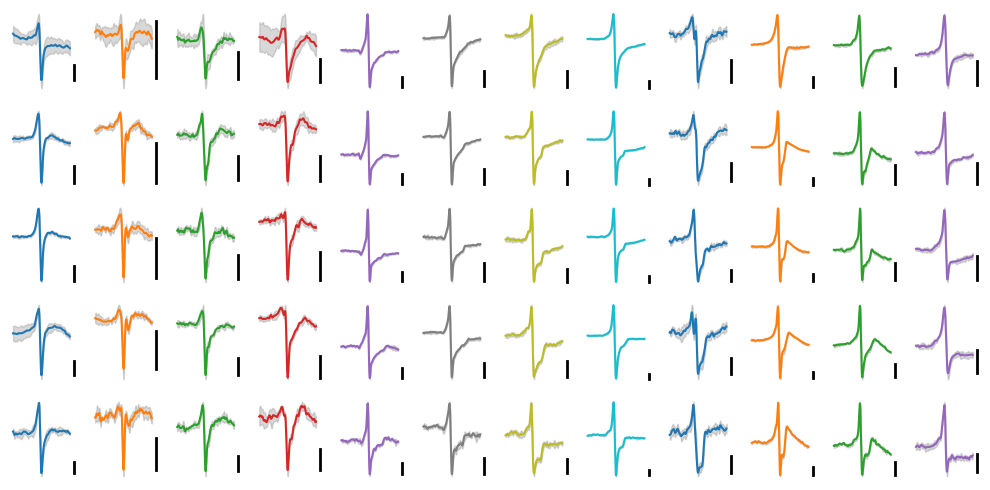

In [6]:
waveforms = an_spks_all.X
channels = an_spks_all.obs['channels']   
stages = an_spks_all.obs['stages']  

unique_channels = channels.unique()
unique_dates = stages.unique()

cmap = cm.get_cmap('tab10', 10)
original_channel_indices = list(range(16))  
channel_colors = {f'ch{ch}': cmap(i % 10) for i, ch in enumerate(original_channel_indices)} 

amplitude_bar_height = 20  # scale bar 

fig, axes = plt.subplots(len(unique_dates), len(unique_channels), figsize=(10, 5), sharex=True)

for i, date in enumerate(unique_dates):
    for j, channel in enumerate(unique_channels):
        mask = (channels == channel) & (stages == date)
        channel_waveforms = waveforms[mask, :] 

        mean_waveform = np.mean(channel_waveforms, axis=0)
        std_waveform = np.std(channel_waveforms, axis=0)

        ax = axes[i, j]
        time_axis = np.arange(mean_waveform.shape[0]) 

        ax.plot(time_axis, mean_waveform, color=channel_colors.get(channel, "black"), label=f'{date} {channel}')
        ax.fill_between(time_axis, mean_waveform - std_waveform, mean_waveform + std_waveform, color='gray', alpha=0.3)

        ax.axis('off')

        y_position = mean_waveform.min()  
        ax.plot([time_axis[-1] + 300, time_axis[-1] + 300], [y_position, y_position + amplitude_bar_height], color="black", lw=2)

plt.tight_layout()
plt.show()
